#### Microbiome Analysis

In this jupyter notebook we will do some basic graphing of a feature table of microbes by samples. As a first step let's check that we have 'scenario1_otus.txt' in our current working directory...

In [12]:
from os import listdir
print("Directory contents:",listdir())

Directory contents: ['.git', '.idea', '.ipynb_checkpoints', '.vs', 'Microbiome Analysis - basics.ipynb', 'Microbiome_Analysis_in_class_r2.ipynb', 'PythonProblems1.ipynb', 'README.md', 'scenario1_otus.txt', 'scenario1_otus_pandas.txt', 'show_F.py', '__pycache__']


Let's load the data into python using pandas!

In [ ]:
from pandas import read_csv
from IPython.display import HTML

#Loading the text csv file as pandas
feature_table = read_csv("scenario1_otus_pandas.txt",sep="\t")

#Use OTU ID column to label each row
feature_table = feature_table.set_index('OTU_ID')

#Converting it to HTML to show it
feature_table_to_show = feature_table.to_html()

#Show the HTML
HTML(feature_table_to_show)



,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,patient11,patient12
OTU_ID,,,,,,,,,,,,
OTU1,3,4,2,2,0,4,4,4,0,3,2,2
OTU2,4,1,3,4,1,3,3,3,4,1,1,4
OTU3,1,4,2,1,4,2,2,2,1,4,4,1
OTU4,2,3,0,1,2,0,1,2,3,0,2,1
OTU5,0,0,0,0,0,0,1,4,2,2,3,4


### Graphing the data

The clustermap function in seaborn is a convenient way to make a heatmap of our data, clustered according to the similarity of rows and columns.

In [18]:
from seaborn import clustermap
clustermap(feature_table)

If we don't want to cluster the data, and just want a basic heatmap, we can set the row_cluster and col_cluster parameters to False.

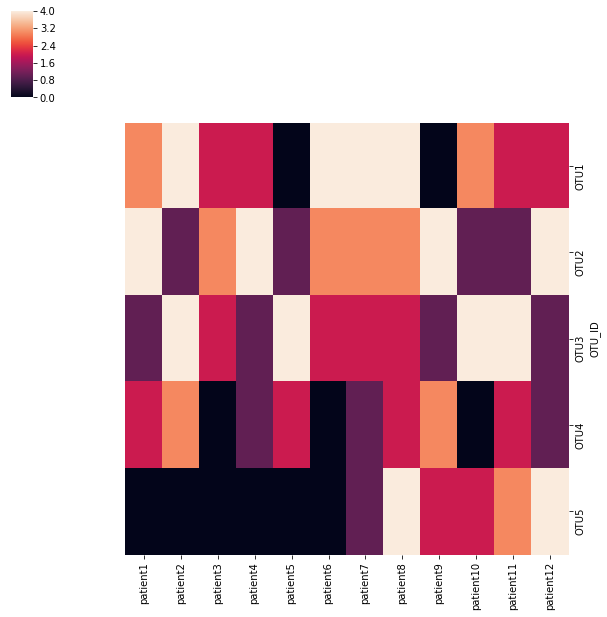

In [81]:
clustermap(feature_table,row_cluster=False,col_cluster=False)

If we wanted to swap the rows and columns, we could use the pandas DataFrame method .transpose() to swap the rows and columns of the DataFrame, and then rerun the clustermap on the transposed data. We can also separately control clustering of rows and columns with the row_cluster and col_cluster parameters. Finally, we can change the color mapping or 'cmap' using the cmap paramter. 

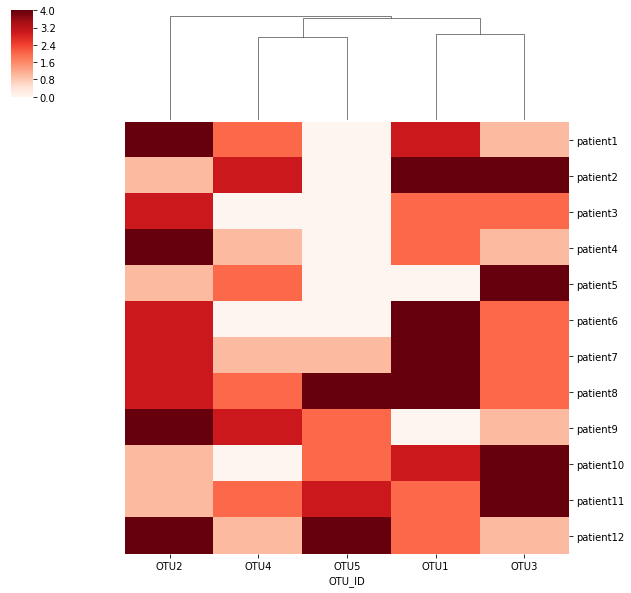

In [84]:
feature_table_transposed = feature_table.transpose()
clustermap(feature_table_transposed, row_cluster=False,col_cluster=True,cmap='Reds')

#### Accessing column data

We might want to access the rows or columns of our pandas data directly so that we can do calculations. A nice tutorial on this can be found here: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/.

In brief, we can select a column by indexing into the pandas DataFrame object using a column name. I currently have the OTUs as columns, so we could access them with feature_table["OTU1"]

In [61]:
#Access a column and convert it to a list.
print(feature_table["OTU1"])





patient1     3
patient2     4
patient3     2
patient4     2
patient5     0
patient6     4
patient7     4
patient8     4
patient9     0
patient10    3
patient11    2
patient12    2
Name: OTU1, dtype: int64


However, this way of selecting columns in pandas is a bit special-purpose - it doesn't always extend in the simplest way to rows for example.

#### A consistent way to access row or column data in pandas

An alternative way to index into a pandas DataFrame is by using the .loc indexer (accessed by the name of your dataframe and then .loc)

Note that this is not called like a function (so not 'df.loc('whatever')'), but more a way of indexing (closer to how you would call it if loc were a dict that was a property of the dataframe).

When using .loc, we specify what rows we want, then what columns we want. We can use the colon character to indicate 'all'. In this way we can do row and column selection using exactly the same syntax, which is nice for those of us who don't like to remember too many things.

(More info on this here: https://brohrer.github.io/dataframe_indexing.html)

##### Select a column using .loc



In [53]:
#Recall that : means all, and we specify rows,columns when using .loc
print("Select all of the OTU1 column:")
selected_column = feature_table.loc[:,'OTU1']
print(selected_column)



Select all of the OTU1 column:
patient1     3
patient2     4
patient3     2
patient4     2
patient5     0
patient6     4
patient7     4
patient8     4
patient9     0
patient10    3
patient11    2
patient12    2
Name: OTU1, dtype: int64

Select the patient1 row:
OTU_ID
OTU1    3
OTU2    4
OTU3    1
OTU4    2
OTU5    0
Name: patient1, dtype: int64

Select one cell by specifying row and column:
3


Cool! So we see that we now get the count of microbe 1 ('OTU1') in each patient's sample. However, this data type looks kinda funky. That's because it is a pandas Series object. It therefore doesn't print in the same way as either a pandas DataFrame or a python list. We'll talk more about that in a minute. For now, let's continue to explore how to select data using .loc.

##### Select a row from a pandas DataFrame with .loc


In [ ]:
print("\nSelect the patient1 row:")
selected_row = feature_table.loc['patient1',:]
print(selected_row)



##### Select a single entry in our table using .loc by specifying the row and column names

In [ ]:
print("\nSelect one cell by specifying row and column:")
selected_row_and_column = feature_table.loc['patient1','OTU1']
print(selected_row_and_column)

##### Testing what we get back and converting it to other data formats.

We said up above that these pandas Series objects we got back from selecting row or columns of a dataframe don't look quite like either lists or DataFrames. In this case we know the result is a Series, but in cases like this where we don't already know the type of an object we can use the builtin type() function to check the type of any object in python. 

In [47]:
selected_column = feature_table.loc[:,'OTU1']
selected_column_type = type(selected_column)

#WHAT IS THIS? Print the answer to screen
print("\nfeature_table['OTU1'] is an object of type:", selected_column_type)


feature_table['OTU1'] is an object of type: <class 'pandas.core.series.Series'>


Great, so we've now proven to ourselves that this is a pandas Series object. We can now do some Googling to find out more about this data type. One great resource is from the Beyond Data Science blog: https://towardsdatascience.com/pandas-series-a-lightweight-intro-b7963a0d62a2. 

One of the first tasks we might have is to convert this Series back into a basic python type like a list. 

##### Getting a list out of a pandas Series object

Let's say we don't want to work with the data as a series, but instead to convert it to a list. We can do that using the builtin list() function.
        

In [49]:
OTU1_data = list(feature_table.loc[:,"OTU1"])
print(OTU1_data)

[3, 4, 2, 2, 0, 4, 4, 4, 0, 3, 2, 2]


##### Getting a numpy array object out of a pandas Series object

an alternative way of getting numeric data out of a pandas Series object is by calling its .values property, which returns a numpy array of the data.

NOTE: values is a *property* (data stored in the object) not a *method* (function associated with the object. The main reason this matters is because if you call .values() with parentheses by accident, you will get an error

In [59]:
OTU1_data_as_array = feature_table.loc[:,"OTU1"].values
print(OTU1_data_as_array)

[3 4 2 2 0 4 4 4 0 3 2 2]


In [41]:
HTML(feature_table.to_html())
patient1_data = feature_table.loc['patient1',:]
print(patient1_data)

OTU_ID
OTU1    3
OTU2    4
OTU3    1
OTU4    2
OTU5    0
Name: patient1, dtype: int64
